In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset= load_dataset('lukebarousse/data_jobs')
_ = dataset['train'].to_pandas()

_['job_posted_date']= pd.to_datetime(_['job_posted_date'])
_['job_skills'] = _['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = _[_['job_country'] == 'United States']

In [4]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [5]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name= 'skills_count')

df_skills_count.sort_values(by= 'skills_count', ascending= False, inplace= True)

df_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [6]:
job_tiles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_tiles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

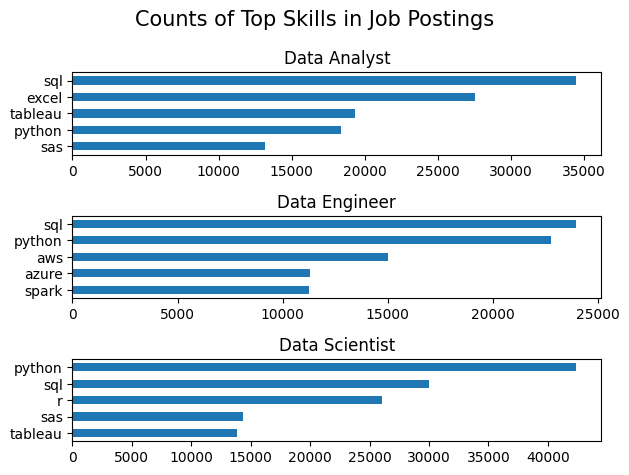

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skills_count', ax=ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [9]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [10]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how= 'left', on= 'job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skills_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skills_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


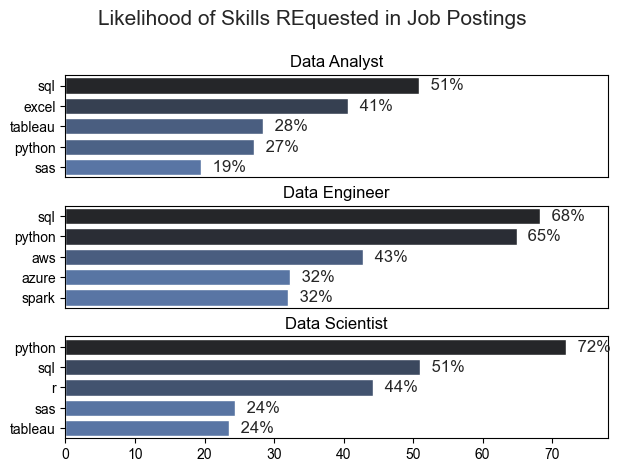

In [11]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style= 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x= 'skill_percent', y='job_skills', ax=ax[i], hue= 'skills_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
         ax[i].text(v + 1,n, f'{v: .0f}%' , va='center') 

    if i !=len(job_titles) - 1:
         ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills REquested in Job Postings', fontsize=15)
fig.tight_layout(h_pad= 0.5)
plt.show()